# 3 Surprising Facts About Global Poverty and Life Expectancy
## By: Kylie Taylor

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})

import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.express as px

from sklearn.linear_model import LinearRegression, LassoCV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [2]:
# Read in the data set
# wide format
masterfile = pd.read_csv("https://raw.githubusercontent.com/KylieTaylor/Udacity-Data-Science-Nanodegree/main/Blog%20Post/Data/masterfile.csv")

# long format
masterfile_long = pd.read_csv("https://raw.githubusercontent.com/KylieTaylor/Udacity-Data-Science-Nanodegree/main/Blog%20Post/Data/masterfile_long.csv")

In [3]:
# inspecting the data set
print(masterfile.describe())

       Unnamed: 0  SI.POV.NAHC_2000  SI.DST.FRST.20_2000  SP.DYN.LE00.IN_2000  \
count  217.000000         17.000000            48.000000           201.000000   
mean   109.000000         40.229412             6.097917            67.012010   
std     62.786676         15.762486             2.389204            10.092609   
min      1.000000         15.300000             1.100000            39.441000   
25%     55.000000         29.000000             3.775000            60.063000   
50%    109.000000         41.600000             6.350000            70.176000   
75%    163.000000         49.800000             7.975000            74.403000   
max    217.000000         69.000000            10.400000            81.076098   

       SE.ENR.PRSC.FM.ZS_2000  NY.GDP.MKTP.CD_2000  NY.GDP.MKTP.KD.ZG_2000  \
count              139.000000         1.990000e+02              193.000000   
mean                 0.961871         1.669563e+11                4.120693   
std                  0.111850       

In [4]:
print(masterfile.head())

   Unnamed: 0    Country.Name  SI.POV.NAHC_2000  SI.DST.FRST.20_2000  \
0           1     Afghanistan               NaN                  NaN   
1           2         Albania               NaN                  NaN   
2           3         Algeria               NaN                  NaN   
3           4  American Samoa               NaN                  NaN   
4           5         Andorra               NaN                  NaN   

   SP.DYN.LE00.IN_2000  SE.ENR.PRSC.FM.ZS_2000  NY.GDP.MKTP.CD_2000  \
0               55.841                     NaN                  NaN   
1               73.955                 0.97621         3.480355e+09   
2               70.640                 0.96421         5.479023e+10   
3                  NaN                     NaN                  NaN   
4                  NaN                     NaN         1.429049e+09   

   NY.GDP.MKTP.KD.ZG_2000  NY.GDP.PCAP.CD_2000  FP.CPI.TOTL.ZG_2000  ...  \
0                     NaN                  NaN                  

In [5]:
# removing the first column which is a duplicate of the index 
masterfile.drop(['Unnamed: 0'], axis=1, inplace=True)
masterfile_long.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# inspect that the code worked correctly
print(masterfile_long.head(3))

  Country.Name  Year  SI.POV.NAHC  SI.DST.FRST.20  SP.DYN.LE00.IN  \
0  Afghanistan  2010          NaN             NaN          61.028   
1  Afghanistan  2011         38.3             NaN          61.553   
2  Afghanistan  2012          NaN             NaN          62.054   

   SE.ENR.PRSC.FM.ZS  NY.GDP.MKTP.CD  NY.GDP.MKTP.KD.ZG  NY.GDP.PCAP.CD  \
0            0.62581    1.585657e+10          14.362441      543.303042   
1            0.66345    1.780429e+10           0.426355      591.162759   
2            0.66925    2.000160e+10          12.752287      641.871479   

   FP.CPI.TOTL.ZG  SE.XPD.TOTL.GD.ZS  SE.PRM.ENRR.FE  SE.ENR.PRIM.FM.ZS  \
0        2.178538            3.47945        80.63546            0.67981   
1       11.804186            3.46201        80.93683            0.71258   
2        6.441213            2.60420        86.32884            0.72026   

   SE.PRM.UNER  
0          NaN  
1          NaN  
2          NaN  


In [7]:
# Data dictionary for what each column is measuring 
markers = {
    'SI.POV.NAHC' : 'Poverty headcount ratio at national poverty lines (percent of population)',
    'SI.DST.FRST.20' : 'Income share held by lowest 20%',
    'SP.DYN.LE00.IN' : 'Life expectancy at birth, total (years)',
    'SE.ENR.PRSC.FM.ZS' : 'School enrollment, primary and secondary (gross), gender parity index (GPI)',
    'NY.GDP.MKTP.CD' : 'GDP (current US$)',
    'NY.GDP.MKTP.KD.ZG' : 'GDP growth (annual %)',
    'NY.GDP.PCAP.CD' : 'GDP per capita (current US$)',
    'FP.CPI.TOTL.ZG' : 'Inflation, consumer prices (annual %)',
    'SE.XPD.TOTL.GD.ZS' : 'Government expenditure on education as percent of GDP',
    'SE.PRM.ENRR.FE' : 'Gross enrollment ratio, primary, female (%)',
    'SE.ENR.PRIM.FM.ZS' : 'Gross enrollment ratio, primary, gender parity index (GPI)',
    'SE.PRM.UNER' : 'Out-of-school children of primary school age, both sexes (number)'
}

## Poverty Rates from 2020 to 2015 

The rate of poverty in all countries has been stable over the years 2010 to 2015 for both the 12 poorest and 12 richest countries. This section provides a simple visual inspection of GDP per Capita from 2010 to 2015. The GDP per capita is reported in USD in adjusted to the 2021 price level.

In [9]:
# subset the masterfile into third world countries and richest oecd countries

poor = ['Tuvalu', 'Somalia', 'Niger', 'Central African Republic', 'South Sudan', 'Chad', 'Burundi', 'Sierra Leone', 'Burkina Faso', 'Mali', 'Liberia', 'Mozambique'] # list of 12 poorest countries

rich  = ['Singapore', 'Qatar', 'Ireland', 'Switzerland', 'Norway', 'United States', 'United Arab Emirates', 'Denmark', 'Netherlands', 'Austria', 'Iceland', 'Germany'] # list of the 12 richest countries

poor_df = masterfile_long[masterfile_long['Country.Name'].isin(poor)]

rich_df = masterfile_long[masterfile_long['Country.Name'].isin(rich)]

In [10]:
poor_df.mean()

Year                 2.012500e+03
SI.POV.NAHC          4.989091e+01
SI.DST.FRST.20       7.033333e+00
SP.DYN.LE00.IN       5.559797e+01
SE.ENR.PRSC.FM.ZS    8.582383e-01
NY.GDP.MKTP.CD       7.976177e+09
NY.GDP.MKTP.KD.ZG    3.292053e+00
NY.GDP.PCAP.CD       9.380470e+02
FP.CPI.TOTL.ZG       6.640387e+00
SE.XPD.TOTL.GD.ZS    3.453939e+00
SE.PRM.ENRR.FE       9.082572e+01
SE.ENR.PRIM.FM.ZS    8.832996e-01
SE.PRM.UNER          6.835956e+05
dtype: float64

In [11]:
rich_df.mean()

Year                 2.012500e+03
SI.POV.NAHC          1.332558e+01
SI.DST.FRST.20       8.416327e+00
SP.DYN.LE00.IN       8.065669e+01
SE.ENR.PRSC.FM.ZS    9.924175e-01
NY.GDP.MKTP.CD       1.998733e+12
NY.GDP.MKTP.KD.ZG    3.244895e+00
NY.GDP.PCAP.CD       5.895588e+04
FP.CPI.TOTL.ZG       1.666829e+00
SE.XPD.TOTL.GD.ZS    5.631542e+00
SE.PRM.ENRR.FE       1.014331e+02
SE.ENR.PRIM.FM.ZS    1.000509e+00
SE.PRM.UNER          6.707186e+04
dtype: float64

In [12]:
def time_plot(data, status, pal):
    """ 
    Make line plots of GDP per Capita over 2010 to 2015
    INPUTS: data - subset of poorest or richest countries, poor_df or rich_df
            pal - either None or "mako_r" or "flare"
            status - either "Poorest" or "Richest"
    OUTPUT: plt - line plot of the GDP per capita for years 2010 to 2015 for each country in the subsetted df
    """
    palette = sns.color_palette(pal, len(pd.unique(data['Country.Name'])))
    sns.lineplot(
        data = data, x = "Year", y = "NY.GDP.PCAP.CD",
        hue = "Country.Name",
        palette = palette
    ) 
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('GDP Per Capita of the 12 {status} Countries'.format(status=status))
    plt.ylabel('GDP Per Capita (US$)')
    plt.savefig('Images/GDP over time {status}.jpg'.format(status=status),dpi=150, figsize=(8,10))

    return plt
    

<module 'matplotlib.pyplot' from 'C:\\Users\\tayloky2\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

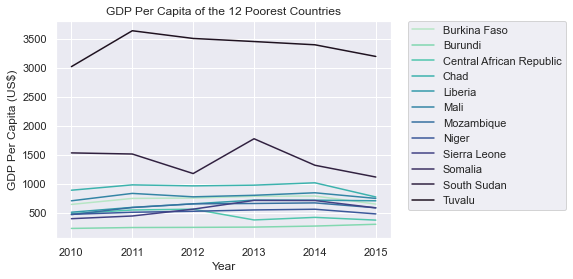

In [13]:
time_plot(data=poor_df, status="Poorest", pal="mako_r")

<module 'matplotlib.pyplot' from 'C:\\Users\\tayloky2\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

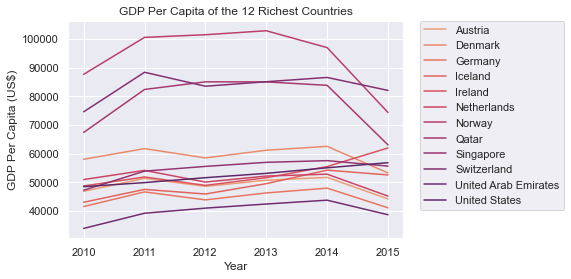

In [14]:
time_plot(data=rich_df, status="Richest", pal="flare")

## Lag of Education on GDP and Life Expectancy

This section calculates the correlation between a countries' education rate and GDP growth and percent of population in poverty. The lag of school expenditure and enrollment are used in the correlations, becuase the effects of spending and enrollment in 2015 will not be seen in 2015. One MAJOR caveat is that we may not be able to see a reliable relationship with a 5 year lag. 

In [15]:
# reprint this bad boy becuase I'm lazy
for col in masterfile.columns: 
    print(col)

Country.Name
SI.POV.NAHC_2000
SI.DST.FRST.20_2000
SP.DYN.LE00.IN_2000
SE.ENR.PRSC.FM.ZS_2000
NY.GDP.MKTP.CD_2000
NY.GDP.MKTP.KD.ZG_2000
NY.GDP.PCAP.CD_2000
FP.CPI.TOTL.ZG_2000
SI.POV.NAHC_2001
SI.DST.FRST.20_2001
SP.DYN.LE00.IN_2001
SE.ENR.PRSC.FM.ZS_2001
NY.GDP.MKTP.CD_2001
NY.GDP.MKTP.KD.ZG_2001
NY.GDP.PCAP.CD_2001
FP.CPI.TOTL.ZG_2001
SI.POV.NAHC_2002
SI.DST.FRST.20_2002
SP.DYN.LE00.IN_2002
SE.ENR.PRSC.FM.ZS_2002
NY.GDP.MKTP.CD_2002
NY.GDP.MKTP.KD.ZG_2002
NY.GDP.PCAP.CD_2002
FP.CPI.TOTL.ZG_2002
SI.POV.NAHC_2003
SI.DST.FRST.20_2003
SP.DYN.LE00.IN_2003
SE.ENR.PRSC.FM.ZS_2003
NY.GDP.MKTP.CD_2003
NY.GDP.MKTP.KD.ZG_2003
NY.GDP.PCAP.CD_2003
FP.CPI.TOTL.ZG_2003
SI.POV.NAHC_2004
SI.DST.FRST.20_2004
SP.DYN.LE00.IN_2004
SE.ENR.PRSC.FM.ZS_2004
NY.GDP.MKTP.CD_2004
NY.GDP.MKTP.KD.ZG_2004
NY.GDP.PCAP.CD_2004
FP.CPI.TOTL.ZG_2004
SI.POV.NAHC_2005
SI.DST.FRST.20_2005
SP.DYN.LE00.IN_2005
SE.ENR.PRSC.FM.ZS_2005
NY.GDP.MKTP.CD_2005
NY.GDP.MKTP.KD.ZG_2005
NY.GDP.PCAP.CD_2005
FP.CPI.TOTL.ZG_2005
SI.POV.NA

In [16]:
# select subset of gdp, life expectancy, and education variables
subset = masterfile[["Country.Name", "NY.GDP.PCAP.CD_2015", "SP.DYN.LE00.IN_2015", "SE.XPD.TOTL.GD.ZS_2010", "SE.ENR.PRIM.FM.ZS_2010","SE.XPD.TOTL.GD.ZS_2011", "SE.ENR.PRIM.FM.ZS_2011", "SE.XPD.TOTL.GD.ZS_2012", "SE.ENR.PRIM.FM.ZS_2012", "SE.XPD.TOTL.GD.ZS_2013", "SE.ENR.PRIM.FM.ZS_2013", "SE.XPD.TOTL.GD.ZS_2014", "SE.ENR.PRIM.FM.ZS_2014"]]

# rename the columns
subset.columns = ["Country", "GDP_per_Cap_2015", "Life_Expectancy_2015", "Expenditure_2010", "Enrollment_2010", "Expenditure_2011", "Enrollment_2011", "Expenditure_2012", "Enrollment_2012", "Expenditure_2013", "Enrollment_2013", "Expenditure_2014", "Enrollment_2014"]

subset_poor = subset[subset['Country'].isin(poor)]

subset_rich = subset[subset["Country"].isin(rich)]


In [17]:
def corr_plot(data, status, pallette=None):
    """ 
    Make correlation plots with seaborn heatmap
    INPUTS: data - subset of poorest or richest countries, subset_poor or subset_rich
            pallette - either None or "mako" for poor countries
            status - either "Poorest" or "Richest"
    OUTPUT: plt - correlation heatmap of the lag of school metrics on GDP and life expectancy of given data set
    """

    C = data.corr()[["GDP_per_Cap_2015", "Life_Expectancy_2015"]]
    C1 = pd.DataFrame(C)
    sns.heatmap(C1, annot=True, cmap=pallette)
    plt.title("School Expenditure and Enrollment Correlations of the 12 {status} Countries".format(status=status))
    plt.savefig('Images/{status} correlations.jpg'.format(status=status), dpi=150, figsize=(10,8)) 
    return plt
    

<module 'matplotlib.pyplot' from 'C:\\Users\\tayloky2\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

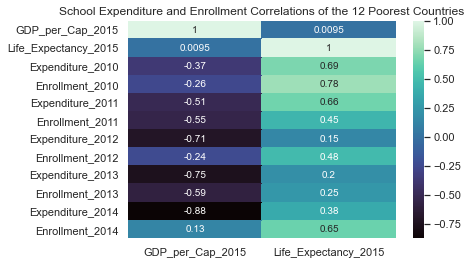

In [18]:
corr_plot(data=subset_poor, status="Poorest", pallette="mako")

<module 'matplotlib.pyplot' from 'C:\\Users\\tayloky2\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

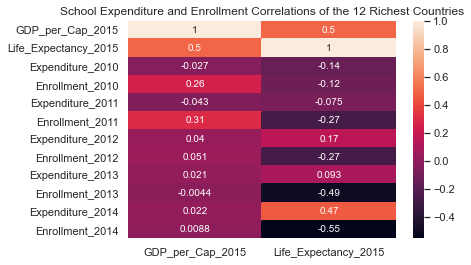

In [19]:
corr_plot(data=subset_rich, status="Richest")

## Heatmap of Countries

The following section clusters countries by GDP per capita and life expectancy for the years 2010 to 2015. 
In order to successfully run the clustering algorithm, missing data needs to be dealt with. I had one of two options: drop all countries with missing values (which would drop majority of the countries from the dataset), or impute missing values (the decided route!).

Missing values were imputed using sklearn's KNN Imputer. The imputer uses 2 nearest neighbors (in this case, neighbors are countries) to calculate the mean value of a either GDP per capita or life expectancy. Two nearest neighbors were chosen to best resemble the uniqueness of individual countries. Not all countries should be modeled the same, therefore using 2 nearest neighbors encourages the algorithm to keep some variability within countries. If I were to hypothetically use 10 nearest neighbors, I would be making the assumption that countries are more similar in GDP per capita and life expectancy, than using 2 nearest neighbors. 

A centroid clustering algorithm is used to cluster the various countries into their respective groups. I felt that the best way to display the results of the clustering was through a heatmap.

In [20]:
# impute missing values using a KNN imputer with 2 neighbors
nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")

mf = masterfile_long.drop(['Country.Name'], axis=1)
df = pd.DataFrame(imputer.fit_transform(mf))
df.columns = mf.columns # rename all the columns

df1 = pd.concat([masterfile_long[["Country.Name"]], df], axis=1) # add the country names back onto the imputed data

In [21]:
def heatmap_plot(value, name):
    """ 
    Make heatmap with seaborn ClusterMap
    INPUTS: value - either "NY.GDP.PCAP.CD" (GDP per capita) or "SP.DYN.LE00.IN" (life expectancy) 
            name - name of outcome parameter to appear in the title and saved file
    OUTPUT: plt - heatmap of the outcome of interest for years 2010 to 2015
    """
    df = pd.pivot_table(df1, values=value, index="Country.Name", columns="Year")
    sns.clustermap(df, col_cluster=False, figsize=(8,25), method='centroid')
    plt.title('Heatmap of {name} from 2010 to 2015'.format(name=name))
    plt.savefig('Images/{name} heatmap.jpg'.format(name=name), dpi=150, figsize=(8,25))
    return plt
    

<module 'matplotlib.pyplot' from 'C:\\Users\\tayloky2\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

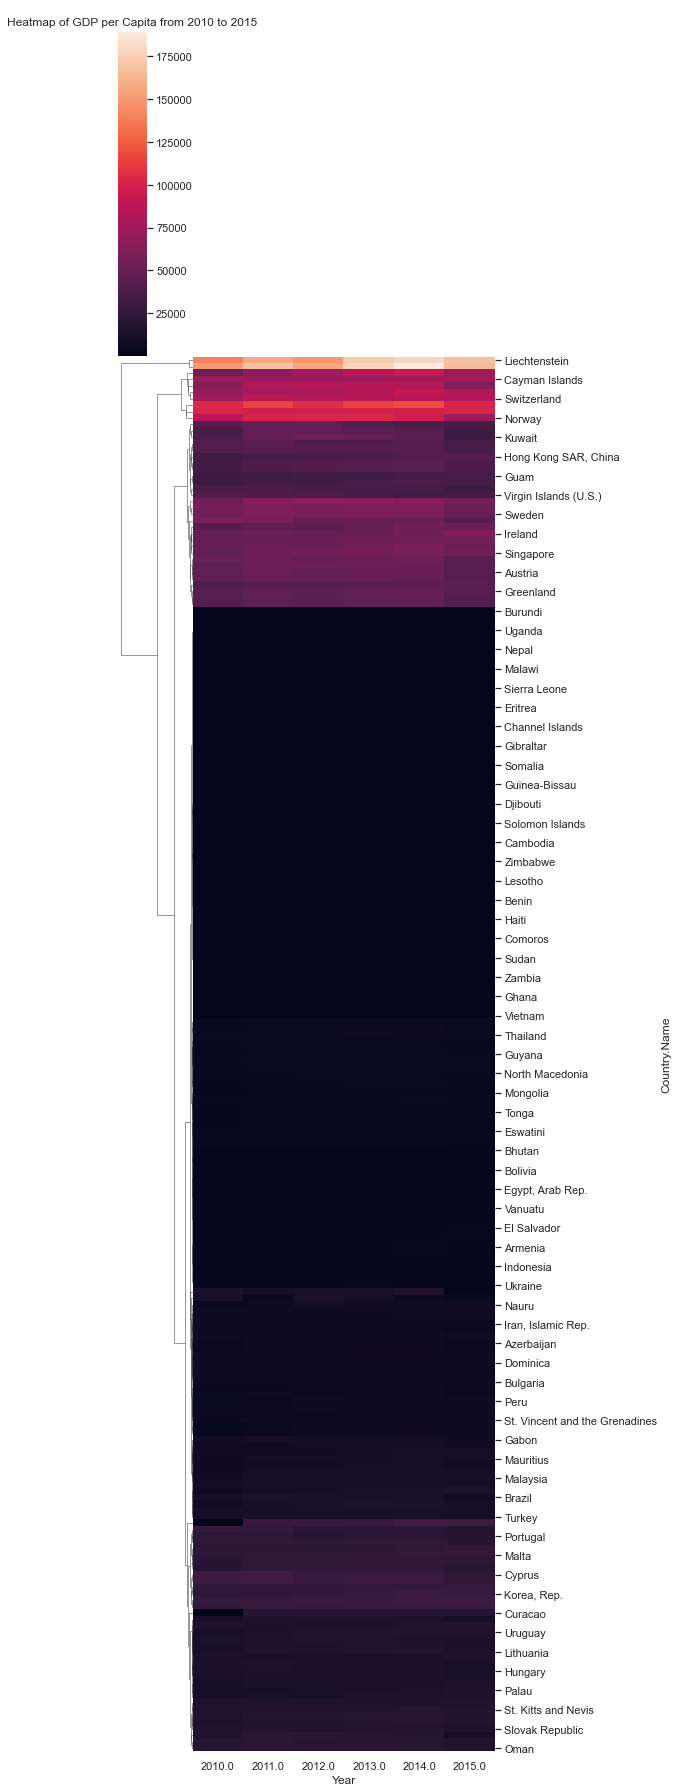

In [22]:
heatmap_plot(value="NY.GDP.PCAP.CD", name="GDP per Capita")

<module 'matplotlib.pyplot' from 'C:\\Users\\tayloky2\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

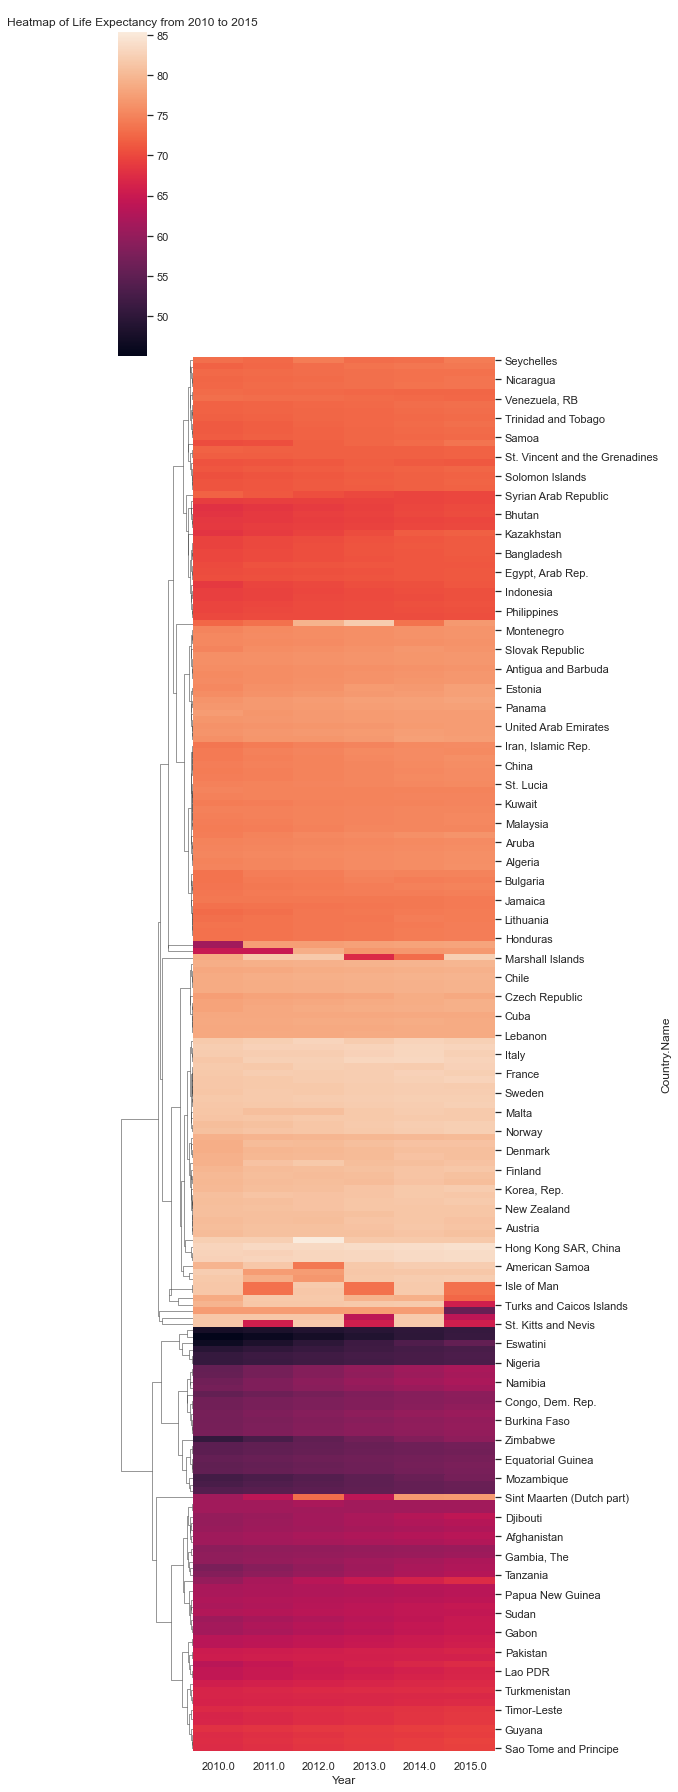

In [23]:
heatmap_plot(value="SP.DYN.LE00.IN", name="Life Expectancy")